In [3]:
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 

import seaborn as sns
import numpy as np

In [4]:
main_data=pd.read_excel('/Users/prit/Downloads/ce2019_nac_csv 2/conjunto_de_datos/ce2019_nac.xlsx')
data_disc=pd.read_csv("/Users/prit/Downloads/ce2019_nac_csv 2/diccionario_de_datos/diccionario_de_datos_ce2019.csv")

In [27]:
average_daily_salary_operational = main_data['A747A'].mean()
average_daily_salary_administrative = main_data['A748A'].mean()
average_salaries = pd.DataFrame({
    'Personnel Type': ['Operational', 'Administrative'],
    'Average Daily Salary (MXN)': [average_daily_salary_operational, average_daily_salary_administrative]
})
average_salaries.to_csv('average_daily_salaries.csv', index=False)

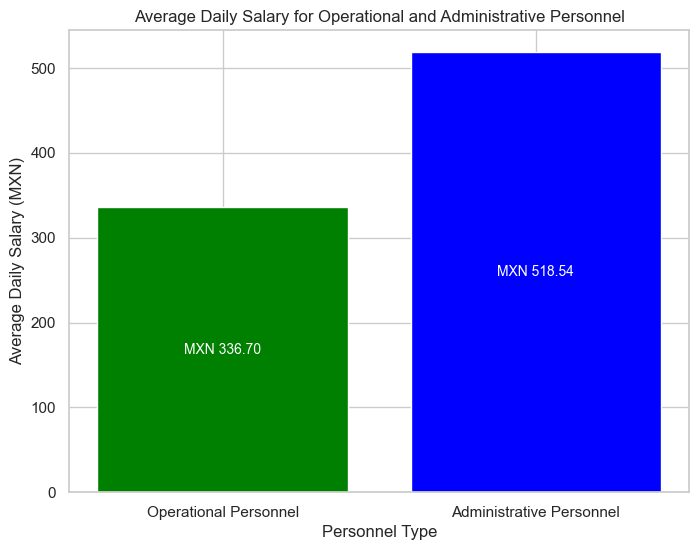

In [39]:

categories = ['Operational Personnel', 'Administrative Personnel']
average_salaries = [average_daily_salary_operational, average_daily_salary_administrative]
colors = ['green', 'blue']  

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, average_salaries, color=colors)

plt.xlabel('Personnel Type')
plt.ylabel('Average Daily Salary (MXN)')
plt.title('Average Daily Salary for Operational and Administrative Personnel')

for bar, salary in zip(bars, average_salaries):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"MXN {salary:.2f}",
             ha='center', va='center', color='white', fontsize=10)
plt.savefig('average_daily_salary_by_occupation.png', format='png', dpi=300)  

plt.show()


In [8]:
estrato_data = pd.read_excel('/Users/prit/Desktop/untitled folder/conjunto_de_datos/ce2019_nac.xlsx')



In [9]:
munci=pd.read_excel('/Users/prit/Desktop/untitled folder/Catalogs/tc_entidad_municipio tr.xlsx')

In [10]:
estrato_data = estrato_data.rename(columns={'ID_STRATUM': 'ID_ESTRATO', ' DESC_STRATUM': 'DESC_ESTRATO'})


In [11]:
stratum_to_region = {
    1: 'Region 1',   
    2: 'Region 2',  
    3: 'Region 3',   
    4: 'Region 4',   
    99: 'Grouped Strata'  
}

In [12]:
main_data['ENTIDAD'] = main_data['ID_ESTRATO'].map(stratum_to_region)


In [28]:

region_stratum_analysis = main_data.groupby(['ENTIDAD', 'ID_ESTRATO'])[['A747A', 'A748A']].mean().reset_index()

region_stratum_analysis.columns = ['Region', 'Stratum ID', 'Average Daily Salary (Operational)', 'Average Daily Salary (Administrative)']

region_stratum_analysis.to_csv('stratum.csv',index=False)


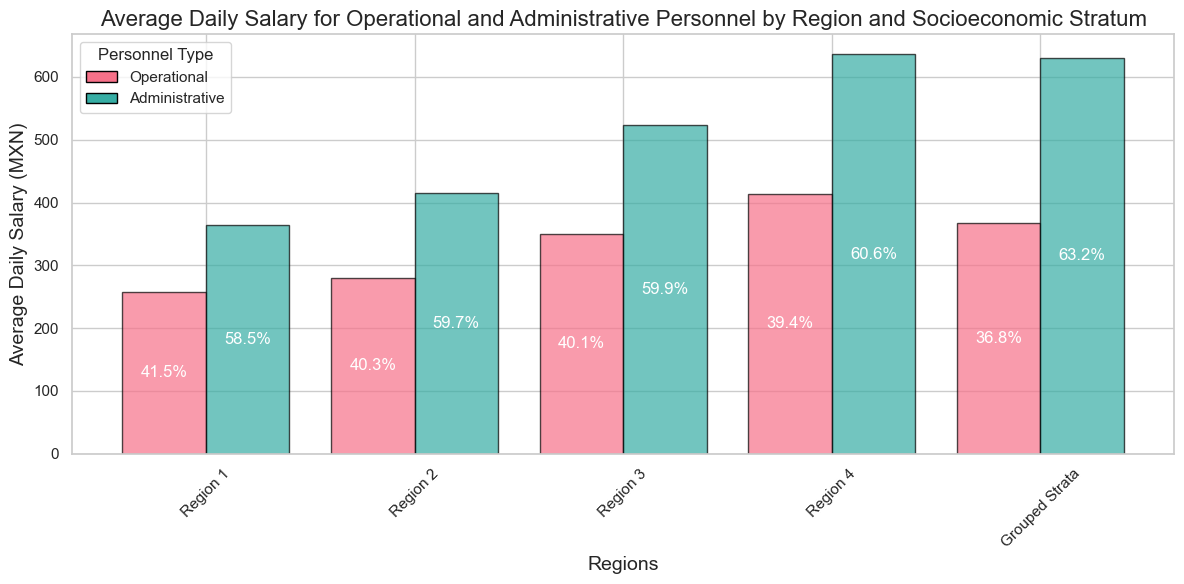

In [60]:

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

color_operational = sns.color_palette("husl", 2)[0]  
color_administrative = sns.color_palette("husl", 2)[1]  

bar_width = 0.4
for i, (index, row) in enumerate(region_stratum_analysis.iterrows()):
    x_operational = i - bar_width / 2
    x_administrative = i + bar_width / 2
    
    y_operational = row['Average Daily Salary (Operational)']
    bar_operational = ax.bar(x_operational, y_operational, color=color_operational, edgecolor='black', linewidth=1, width=bar_width, alpha=0.7)
    
    total_salary = y_operational + row['Average Daily Salary (Administrative)']
    
    operational_percentage = (y_operational / total_salary) * 100
    ax.text(x_operational, y_operational * 0.5, f"{operational_percentage:.1f}%", ha='center', va='center', color='white')

    y_administrative = row['Average Daily Salary (Administrative)']
    bar_administrative = ax.bar(x_administrative, y_administrative, color=color_administrative, edgecolor='black', linewidth=1, width=bar_width, alpha=0.7)

    administrative_percentage = (y_administrative / total_salary) * 100
    ax.text(x_administrative, y_administrative * 0.5, f"{administrative_percentage:.1f}%", ha='center', va='center', color='white')

ax.set_xlabel('Regions', fontsize=14)  
ax.set_ylabel('Average Daily Salary (MXN)', fontsize=14)
ax.set_title('Average Daily Salary for Operational and Administrative Personnel by Region and Socioeconomic Stratum', fontsize=16)

ax.set_xticks(range(len(region_stratum_analysis['Stratum ID'])))
ax.set_xticklabels([stratum_to_region.get(stratum, 'Unknown') for stratum in region_stratum_analysis['Stratum ID']], rotation=45)

legend_elements = [
    Patch(facecolor=color_operational, edgecolor='black', label='Operational'),
    Patch(facecolor=color_administrative, edgecolor='black', label='Administrative')
]
ax.legend(handles=legend_elements, title='Personnel Type')

plt.tight_layout()
plt.savefig('average_daily_salary_by_occupation in each region.png', format='png', dpi=300)  
plt.show()


             Percentage (Operational)  Percentage (Administrative)
Low                         92.193717                    64.590479
Middle-Low                   5.583756                    30.072712
Middle-High                  1.728632                     4.211826
High                         0.493895                     1.124983


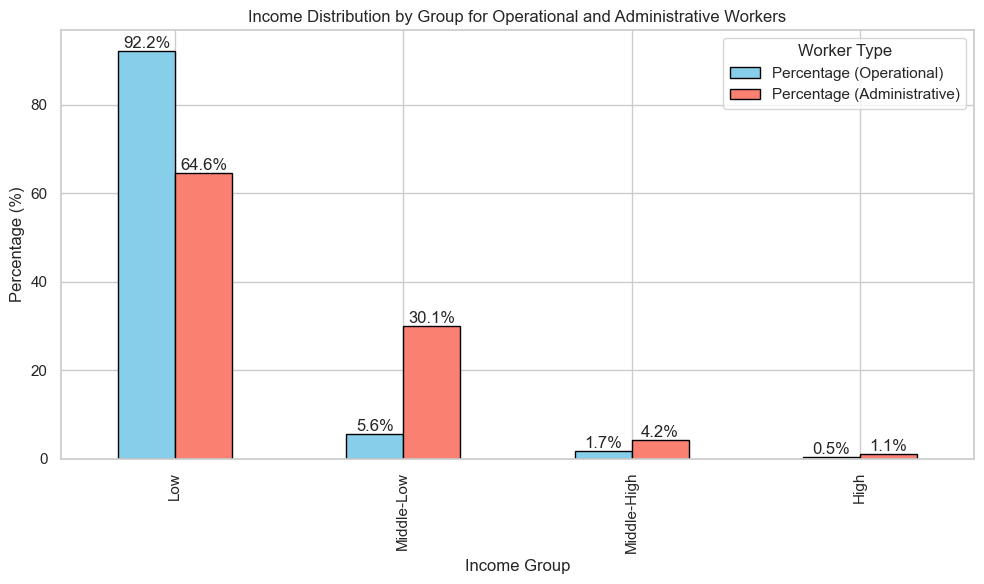

In [29]:
# first I divided the income groups in four categories but from the website I found 7 categories
income_bins = [0, 500, 1000, 2000, np.inf]
income_labels = ['Low', 'Middle-Low', 'Middle-High', 'High']
main_data['Income Group (Operational)'] = pd.cut(main_data['A747A'], bins=income_bins, labels=income_labels, right=False)
main_data['Income Group (Administrative)'] = pd.cut(main_data['A748A'], bins=income_bins, labels=income_labels, right=False)
operational_counts = main_data['Income Group (Operational)'].value_counts(normalize=True) * 100
operational_counts = operational_counts.sort_index()  
operational_counts.name = 'Percentage (Operational)'

administrative_counts = main_data['Income Group (Administrative)'].value_counts(normalize=True) * 100
administrative_counts = administrative_counts.sort_index()  
administrative_counts.name = 'Percentage (Administrative)'

income_distribution = pd.concat([operational_counts, administrative_counts], axis=1)

print(income_distribution)
income_distribution.to_csv('income distrubution.csv')
ax = income_distribution.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Percentage (%)')
plt.title('Income Distribution by Group for Operational and Administrative Workers')
plt.legend(title='Worker Type')


for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.savefig('Income Distribution by Group for Operational and Administrative Workers in four categories.png', format='png', dpi=300)  

plt.show()

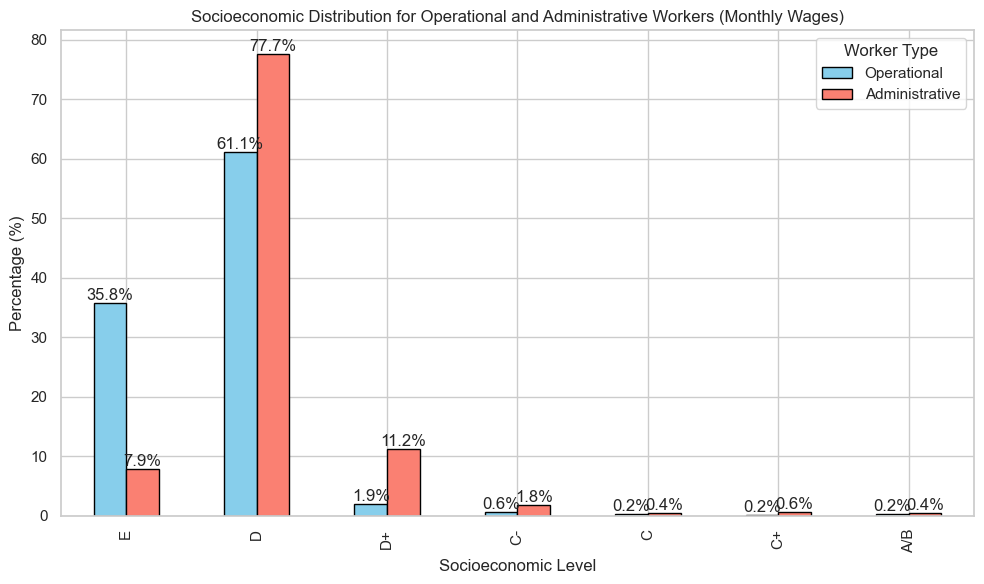

In [47]:
# Assuming the DataFrame income_distribution_per is already created

# Rename the columns for clarity
income_distribution_per.columns = ['Operational (%)', 'Administrative (%)']

# Save the updated income distribution percentages to a new CSV file
output_file_path = 'income_distribution_percentages.csv'  # Adjust the path as necessary
income_distribution_per.to_csv(output_file_path, index=False)

# Plotting the distribution as before
fig, ax = plt.subplots(figsize=(10, 6))
income_distribution.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black')

ax.set_xlabel('Socioeconomic Level')
ax.set_ylabel('Percentage (%)')
ax.set_title('Socioeconomic Distribution for Operational and Administrative Workers (Monthly Wages)')
ax.legend(title='Worker Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.tight_layout()
plt.savefig('Income Distribution by Group for Operational and Administrative Workers in seven categories.png', format='png', dpi=300)  

plt.show()


In [31]:
avg_income_operational = main_data.groupby('Socioeconomic Level (Operational)')['Monthly Salary (Operational)'].mean().reset_index()
avg_income_operational.columns = ['Socioeconomic Level', 'Average Monthly Income (Operational)']

avg_income_administrative = main_data.groupby('Socioeconomic Level (Administrative)')['Monthly Salary (Administrative)'].mean().reset_index()
avg_income_administrative.columns = ['Socioeconomic Level', 'Average Monthly Income (Administrative)']

avg_income_distribution = pd.merge(avg_income_operational, avg_income_administrative, on='Socioeconomic Level', how='outer')

print(avg_income_distribution)
avg_income_distribution.to_csv('income dis by seven.csv')


  Socioeconomic Level  Average Monthly Income (Operational)  \
0                   E                           4053.067695   
1                   D                           7073.621647   
2                  D+                          19988.165036   
3                  C-                          28748.744545   
4                   C                          41075.493750   
5                  C+                          55485.330000   
6                 A/B                         116014.370000   

   Average Monthly Income (Administrative)  
0                              4203.409357  
1                              8528.372696  
2                             17833.053260  
3                             29226.355373  
4                             38813.693750  
5                             54349.935238  
6                             97062.398667  


/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_901/667925085.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_operational = main_data.groupby('Socioeconomic Level (Operational)')['Monthly Salary (Operational)'].mean().reset_index()
/var/folders/ct/586vcml54jgf9dlg8gh73lq40000gn/T/ipykernel_901/667925085.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_administrative = main_data.groupby('Socioeconomic Level (Administrative)')['Monthly Salary (Administrative)'].mean().reset_index()


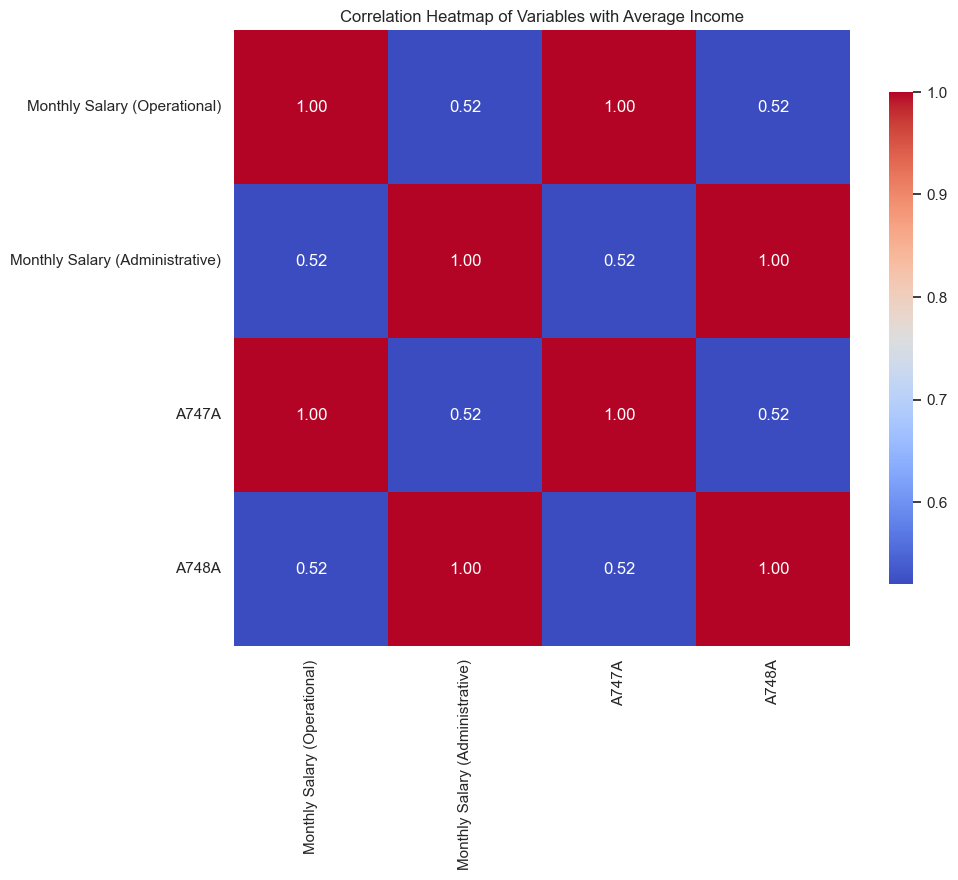

In [33]:
# i created to this to find correlation but I could not find any
main_data['Monthly Salary (Operational)'] = main_data['A747A'] * 20
main_data['Monthly Salary (Administrative)'] = main_data['A748A'] * 20
relevant_columns = ['Monthly Salary (Operational)', 'Monthly Salary (Administrative)', 'A747A','A748A']

correlation_data = main_data[relevant_columns]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Variables with Average Income')
plt.savefig('heat.png', format='png', dpi=300)  

plt.show()
